In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

In [3]:
# Use the iris database to answer the following quesitons:
iris = data('iris')
iris.shape

(150, 5)

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


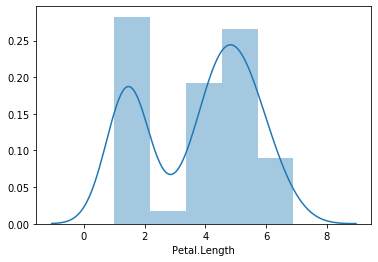

In [5]:
# 1. What does the distribution of petal lengths look like?
sns.distplot(iris['Petal.Length'])

Text(0.5, 0.98, 'Petal Width vs. Petal Length by Species')

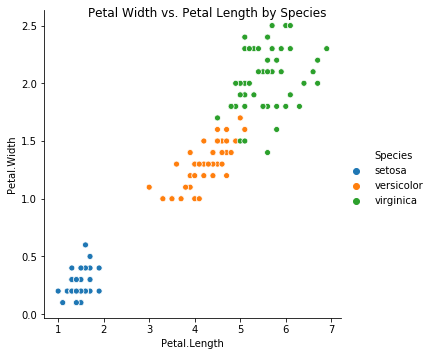

In [6]:
# 2. Is there a correlation between petal length and petal width?
sns.relplot(x='Petal.Length', y='Petal.Width', data=iris, hue='Species')
plt.suptitle('Petal Width vs. Petal Length by Species')

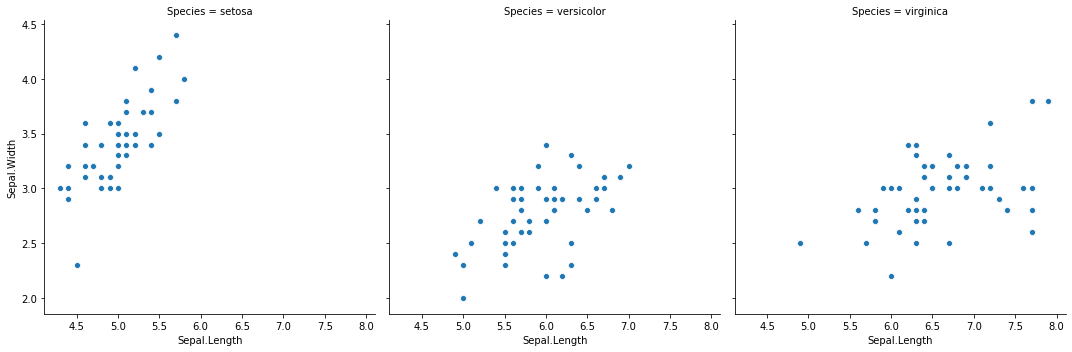

In [114]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# there is overlap on 2 so probably not
sns.relplot(x='Sepal.Length', y='Sepal.Width', data=iris, col='Species')

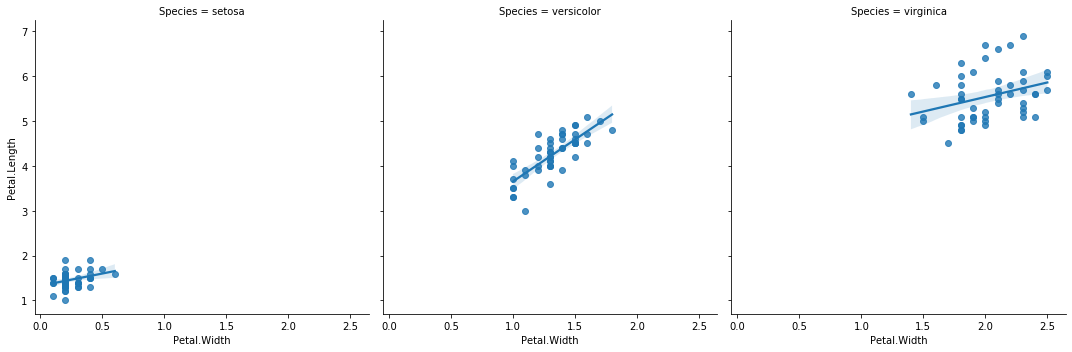

In [8]:
# 4. Which features would be best used to predict species?
sns.lmplot(x='Petal.Width', y='Petal.Length', col='Species', data=iris)

###### Part 2

In [9]:
# 1. Using the lesson as an example, use seaborn's `load_dataset` function to load the 'anscombe' data set. 
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [104]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [11]:
# What do you notice?
# Counts are the same for x and y
# mean is the similar across x and y
# std is similar acorss x and y

In [12]:
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

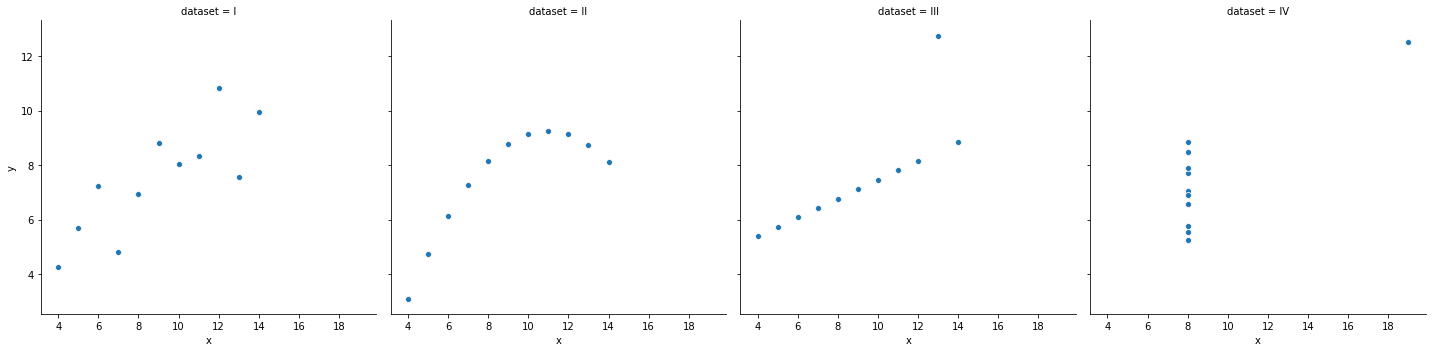

In [13]:
sns.relplot(x='x', y='y', data=anscombe, col='dataset')

In [105]:
# 2. Load the `InsectSprays` dataset and read it's documentation. 
#data('InsectSprays', show_doc=True)
insect_sprays = data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


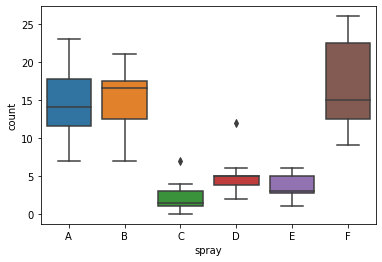

In [15]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(data=insect_sprays, x='spray', y='count')

In [106]:
# 3. Load the `swiss` dataset and read it's documentation. 
#data('swiss', show_doc=True)
swiss = data('swiss')

In [17]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Create visualizations to answer the following questions:

In [108]:
## Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
## (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic > 50
#swiss[['Catholic', 'is_catholic']].sort_values(by='Catholic')

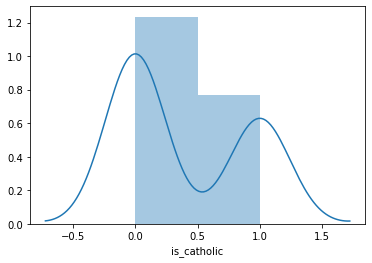

In [109]:
sns.distplot(swiss.is_catholic)

In [20]:
## Does whether or not a province is Catholic influence fertility?

In [110]:
# average fertility for Catholic influence
swiss.groupby('is_catholic').Fertility.agg('mean')

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

In [112]:
cath_fert = pd.crosstab(swiss.is_catholic, swiss.Fertility)
cath_fert

Fertility,35.0,42.8,44.7,54.3,55.7,56.6,57.4,58.3,60.5,61.7,...,80.2,82.4,82.9,83.1,83.8,85.8,87.1,92.2,92.4,92.5
is_catholic,,,,,,,,,,,,,,,,,,,,,
False,1,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
True,0,1,1,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,1,1


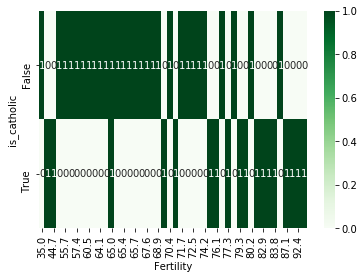

In [23]:
# heatmap shows higher fertility rate distribution in catholic provinces
sns.heatmap(cath_fert, annot=True, cmap=plt.cm.Greens)

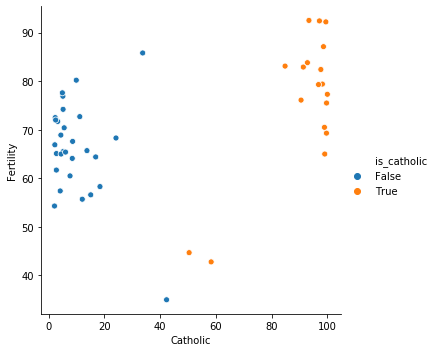

In [115]:
#not significant but a slight difference
sns.relplot(data=swiss, x='Catholic', y='Fertility', hue='is_catholic')

In [25]:
## What measure correlates most strongly with fertility?

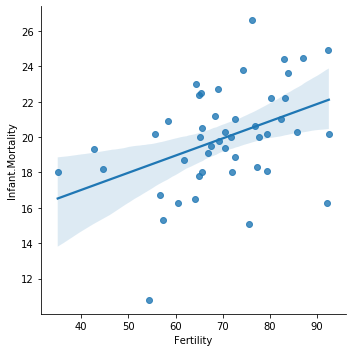

In [26]:
sns.lmplot(data=swiss, x='Fertility', y='Infant.Mortality')

In [80]:
# 4. Using the chipotle dataset from the previous exercise, 
# create a bar chart that shows the 4 most popular items 
# and the revenue produced by each.
from env import host, user, password

def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
chipotle_query = '''
                 SELECT *
                 FROM orders;
                 '''
orders = pd.read_sql(chipotle_query, get_db_url('chipotle'))

In [81]:
#change item_price to a float type for manipulation
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)

In [ ]:
#add total_price column for each observation
orders['total_price'] = orders.quantity * orders.item_price

In [93]:
#create dataframe for most revenue items
most_revenue = pd.DataFrame(orders.groupby('item_name').item_price.agg('sum').sort_values(ascending=False).head(5))
most_revenue

,item_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19
Chips and Guacamole,2201.04


In [74]:
#create dataframe for 4 most popular items (by total quantity)
top_4 = pd.DataFrame(orders.groupby('item_name')\
        .quantity.agg('sum').sort_values(ascending=False)\
        .head(4))
top_4

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [98]:
# merge data and add a revenue column that represents the total revenue based on all orders
top_4_revenue = pd.merge(top_4, most_revenue, on='item_name', how='left')
top_4_revenue['revenue'] = top_4_revenue.quantity * top_4_revenue.item_price
top_4_revenue

,item_name,quantity,item_price,revenue
0,Chicken Bowl,761,7342.73,5587817.53
1,Chicken Burrito,591,5575.82,3295309.62
2,Chips and Guacamole,506,2201.04,1113726.24
3,Steak Burrito,386,3851.43,1486651.98


In [77]:
#top_overall_price = pd.DataFrame(orders.groupby('item_name')\
#        .item_price.agg('sum').sort_values(ascending=False).head())
#top_overall_price

Text(0.5, 1.0, 'Revenue of Top 4 Items at Chipotle')

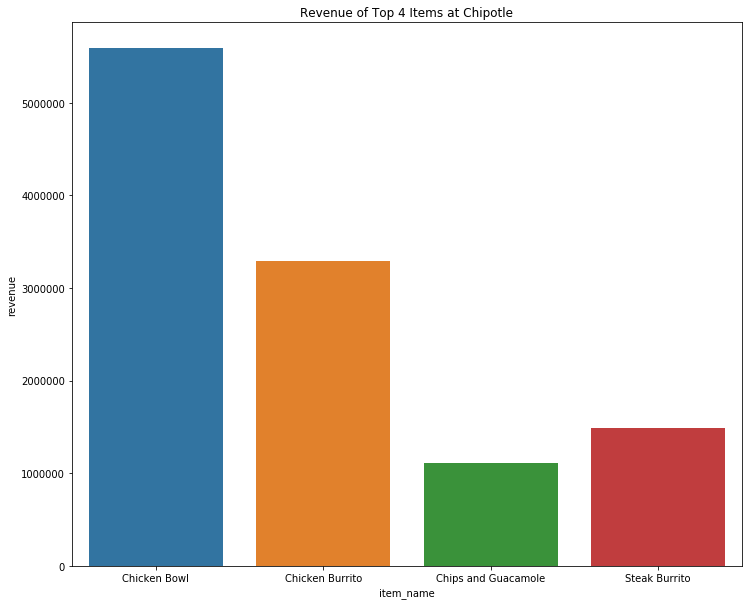

In [99]:

plt.figure(figsize=(12, 10))
sns.barplot(data=top_4_revenue, x='item_name', y='revenue')
plt.title('Revenue of Top 4 Items at Chipotle')

In [113]:
# 5. Load the sleepstudy data and read it's documentation. 
sleepstudy = data('sleepstudy')
#data('sleepstudy', show_doc=True)

In [49]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


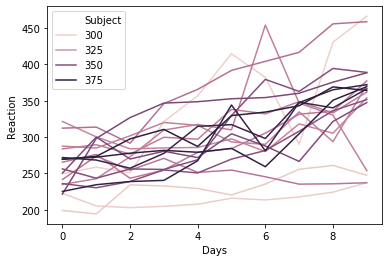

In [122]:
# Use seaborn to create a line chart of all the individual 
# subject's reaction times and a more prominant line showing 
# the average change in reaction time.

line_rxn = sns.lineplot(data=sleepstudy, x='Days', y='Reaction', hue='Subject')

In [124]:
avg_reaction_sub = pd.DataFrame(sleepstudy.groupby('Days').Reaction.agg('mean'))
avg_reaction_sub = avg_reaction_sub.reset_index()
avg_reaction_sub

,Days,Reaction
0,0,256.651806
1,1,264.495756
2,2,265.361900
3,3,282.992011
4,4,288.649422
5,5,308.518456
6,6,312.178256
7,7,318.750583
8,8,336.629506
9,9,350.851222


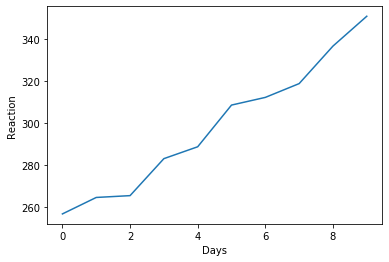

In [125]:
line_avg = sns.lineplot(data=avg_reaction_sub, x='Days', y='Reaction')